## Continuous Control: Reacher

In [5]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch
from agent import Agent
from model import ActorCriticNetwork

In [ ]:
#load the reacher environment 
env = UnityEnvironment(file_name='Reacher_Linux_NoVis/Reacher.x86_64', worker_id=1)

In [7]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# size of each state
state_size = brain.vector_observation_space_size
print('Size of each state:', state_size)

Number of agents: 20
Size of each action: 4
Size of each state: 33


In [8]:
def a2c(agent, num_agents, num_episodes=400):

    all_scores = []
    scores_window = deque(maxlen=100)

    for i_episode in range(1, num_episodes + 1):

        avg_score = agent.step()
        scores_window.append(avg_score)
        all_scores.append(avg_score)

        if i_episode % 25 == 0:
            print("Average score:", np.mean(scores_window), "at:", i_episode)

        if np.mean(scores_window) >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.network.state_dict(), 'solution.ckpt')
            break

    return all_scores


#build networks
agent = Agent(env, brain_name, num_agents, state_size, action_size)
scores = a2c(agent, num_agents)

Average score: 1.646079963207245 at: 25
Average score: 3.6543599183186886 at: 50
Average score: 5.340286547301957 at: 75
Average score: 6.606604852330872 at: 100
Average score: 9.133724795845337 at: 125
Average score: 11.209229749454185 at: 150
Average score: 12.94697471061256 at: 175
Average score: 14.687704671704212 at: 200
Average score: 16.514739630866796 at: 225
Average score: 18.413609588423746 at: 250
Average score: 20.539579540904615 at: 275
Average score: 22.653689493650567 at: 300
Average score: 25.01883444078546 at: 325
Average score: 27.15377939306572 at: 350
Average score: 29.00508935168572 at: 375

Environment solved in 289 episodes!	Average Score: 30.04


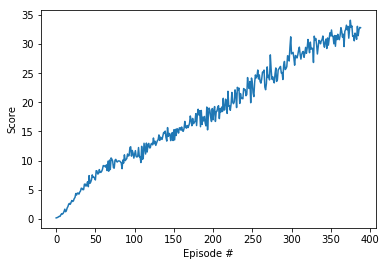

In [11]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
